# Dataset description
- age : Age of the patient
- Sex : 1 = male; 0 = female
- exng: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slp: the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)
- thall: 2 = normal; 1 = fixed defect; 3 = reversable defect.
- caa: number of major vessels (0-3)
- cp : Chest Pain type chest pain type
 - Value 0: typical angina
 - Value 1: atypical angina
 - Value 2: non-anginal pain
 - Value 3: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg : resting electrocardiographic results
 - Value 0: normal
 - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalachh : maximum heart rate achieved
- output: target : 0 = less chance of heart attack 1 = more chance of heart attack

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random

random.seed(224)
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/Classification/HeartAttack/heart.csv')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Renaming columns
df.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBloodPressure', 'Cholesterol', 'FastingBloodSugar', 'RestingECG', 'MaxHeartRate',
       'ExerciseInducedAngina', 'PreviousPeak', 'Slope', 'MajorBloodVessels', 'ThalRate', 'ProbHA']

categoricals = ['Sex', 'ChestPainType', 'FastingBloodSugar', 'RestingECG', 'ExerciseInducedAngina', 'Slope', 'ThalRate', 'ProbHA']
numericals = [i for i in df.columns if i not in categoricals]

# Investigate categorical features

In [ ]:
for col in df[categoricals]:
  print(f'We have {len(df[col].unique())} unique values in --{col}-- column: {df[col].unique()}')

We have 2 unique values in --Sex-- column: [1 0]
We have 4 unique values in --ChestPainType-- column: [3 2 1 0]
We have 2 unique values in --FastingBloodSugar-- column: [1 0]
We have 3 unique values in --RestingECG-- column: [0 1 2]
We have 2 unique values in --ExerciseInducedAngina-- column: [0 1]
We have 3 unique values in --Slope-- column: [0 2 1]
We have 4 unique values in --ThalRate-- column: [1 2 3 0]
We have 2 unique values in --ProbHA-- column: [1 0]


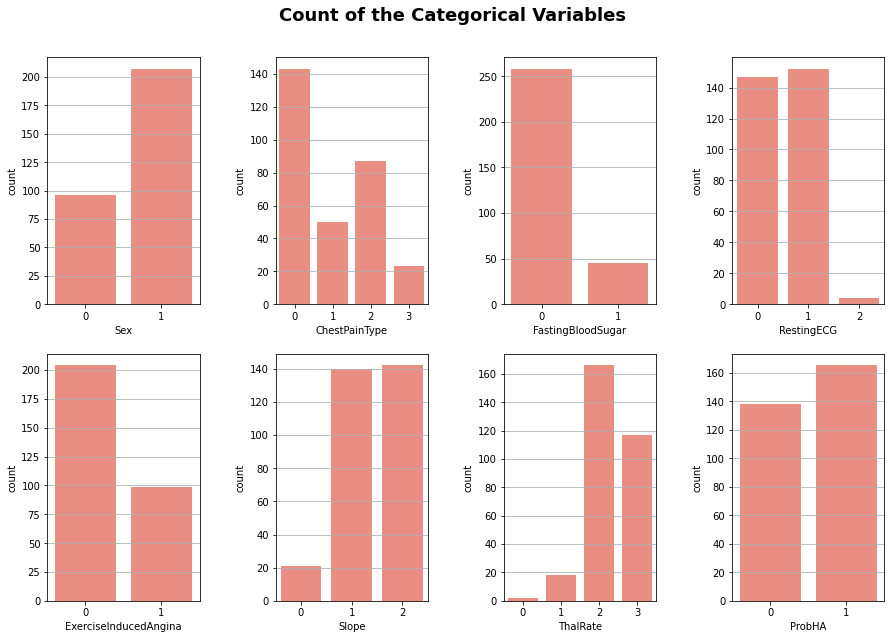

In [ ]:
# Count plots for categorical features
x=0
fig=plt.figure(figsize=(15,10),constrained_layout =True)
plt.subplots_adjust(wspace = 0.5)
plt.suptitle("Count of the Categorical Variables",y=0.95, family='Sherif', size=18, weight='bold')
for i in df[categoricals]:
  ax = plt.subplot(241+x)
  ax = sns.countplot(data=df, x=i, color = 'salmon')
  plt.grid(axis='y')
  x+=1

# Investigate numerical features

In [ ]:
df[numericals].describe()

,Age,RestingBloodPressure,Cholesterol,MaxHeartRate,PreviousPeak,MajorBloodVessels
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000


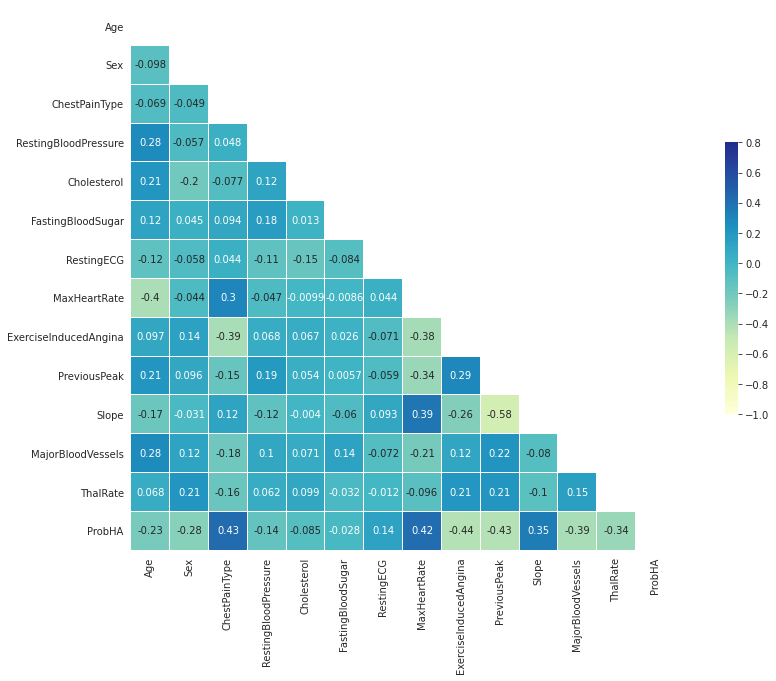

In [ ]:
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
  fig, ax = plt.subplots(figsize=(18,10))
  sns.heatmap(corr,  mask=mask, cmap='YlGnBu', annot=True, center=0, vmin=-1, vmax=0.8,
                square=True, cbar_kws={'shrink':.5, 'orientation': 'vertical'}, linewidth=.02)

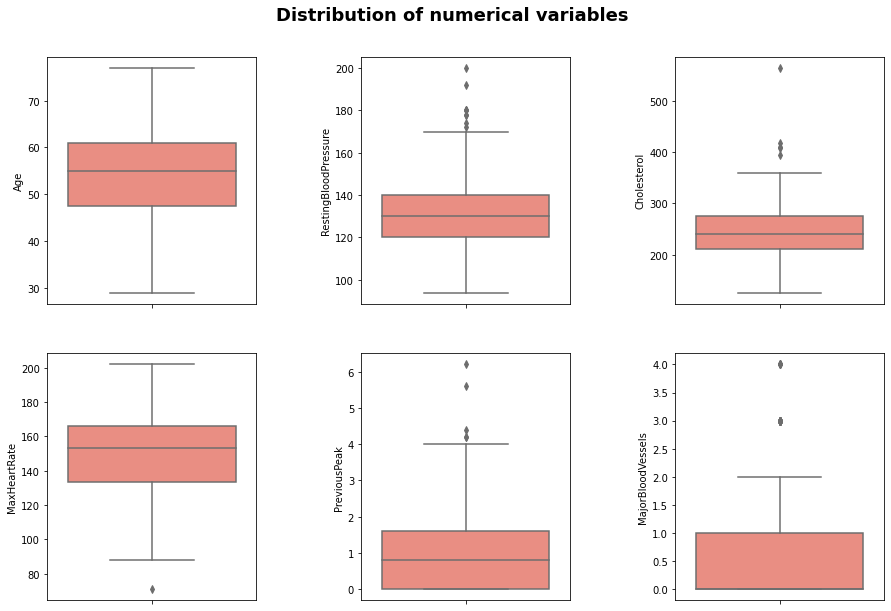

In [ ]:
x=0
fig=plt.figure(figsize=(15,10),constrained_layout =True)
plt.subplots_adjust(wspace = 0.5)
plt.suptitle("Distribution of numerical variables",y=0.95, family='Sherif', size=18, weight='bold')
for i in df[numericals]:
  ax = plt.subplot(231+x)
  ax = sns.boxplot(data=df, y=i, color = 'salmon')
  x+=1

Outlier: Cholesterol > 500; MaxHeartRate < 80


In [ ]:
df.drop(df[df['Cholesterol'] > 500].index, inplace = True)
df.drop(df[df['MaxHeartRate'] < 80].index, inplace = True)
df.shape[0]

301

## Exploratory Data Analysis (EDA)

1    164
0    137
Name: ProbHA, dtype: int64


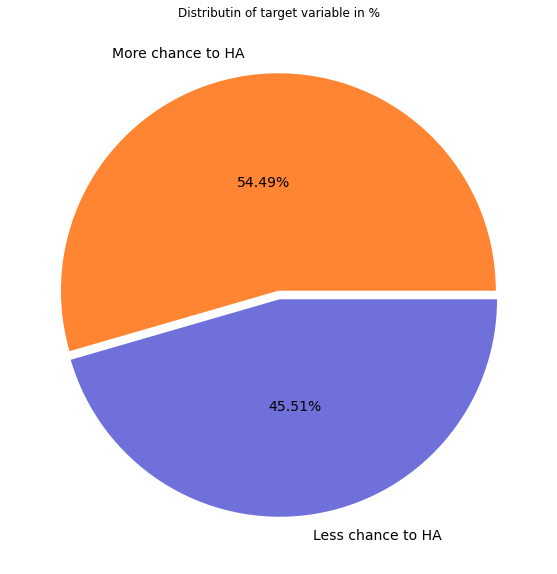

In [ ]:
print(df['ProbHA'].value_counts())

pie, ax = plt.subplots(figsize=[15,10])
labels = ['More chance to HA', 'Less chance to HA']
colors = ['#ff8533', '#7070db']
plt.pie(x = df['ProbHA'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Distributin of target variable in %')
plt.show()

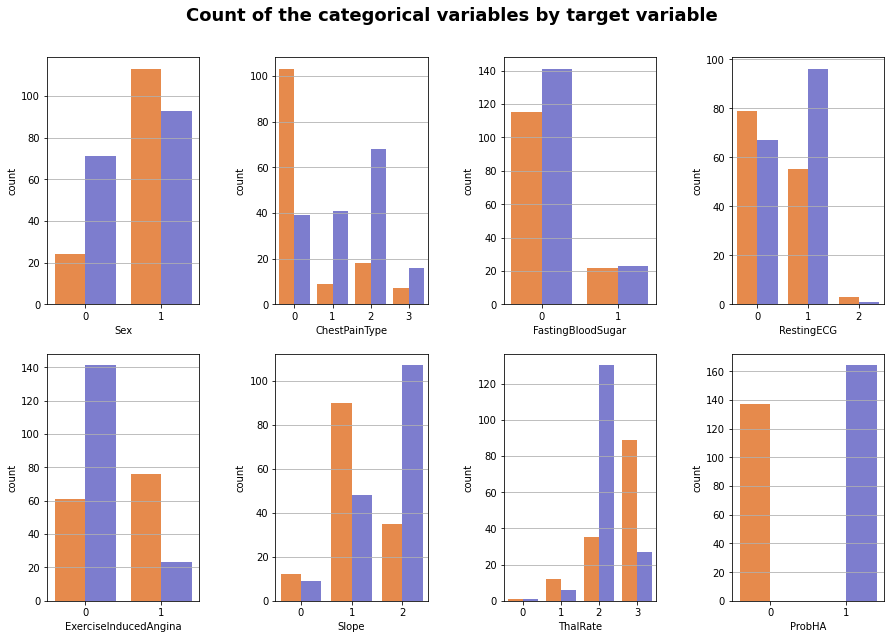

In [ ]:
x=0
fig=plt.figure(figsize=(15,10),constrained_layout =True)
plt.subplots_adjust(wspace = 0.5)
plt.suptitle("Count of the categorical variables by target variable",y=0.95, family='Sherif', size=18, weight='bold')
for i in df[categoricals]:
  ax = plt.subplot(241+x)
  ax = sns.countplot(data=df, x=i, hue='ProbHA', palette = colors)
  ax.legend_.remove()
  plt.grid(axis='y')
  x+=1

Insights:
 - The number of males that are more likely to have a HA from the number of total males is higher than females.
 - The individuals who present a typical angina chest type are more likely to have a HA.
 - The individuals with normal (0) resting electrocardiographic results (Resting ECG) appear to be more likely to suffer a HA.
 - If angina is exercise induced, is more likely to suffer a HA.
 - If the slope of the peak exercise ST segment is flat, is more likely to suffer a HA.
 - If the thal rate is reversable defect, is more likely to suffer a HA. 

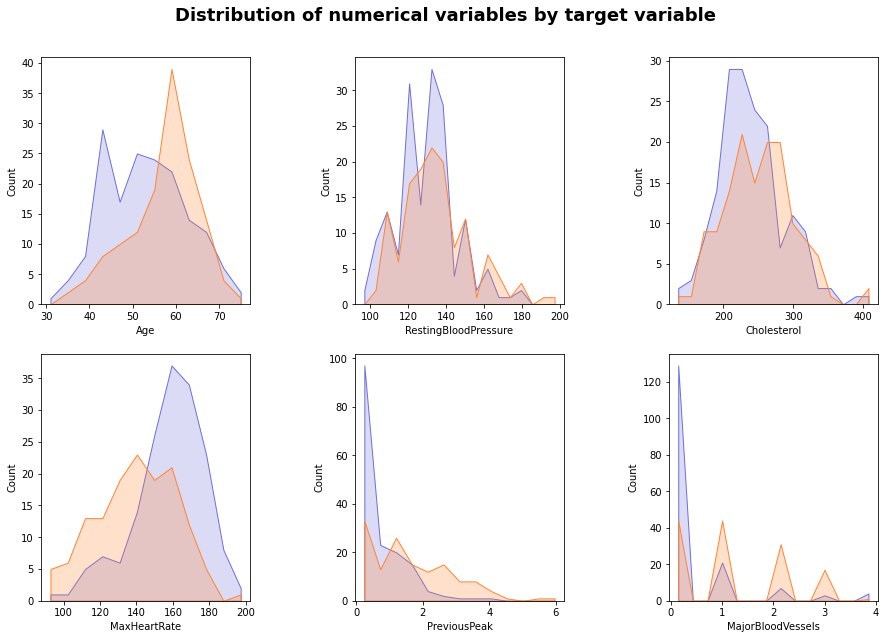

In [ ]:
x=0
fig=plt.figure(figsize=(15,10),constrained_layout =True)
plt.subplots_adjust(wspace = 0.5)
plt.suptitle("Distribution of numerical variables by target variable",y=0.95, family='Sherif', size=18, weight='bold')
for i in df[numericals]:
  ax = plt.subplot(231+x)
  ax = sns.histplot(data=df, x=i, hue='ProbHA', palette=colors, element='poly')
  ax.legend_.remove()
  x+=1

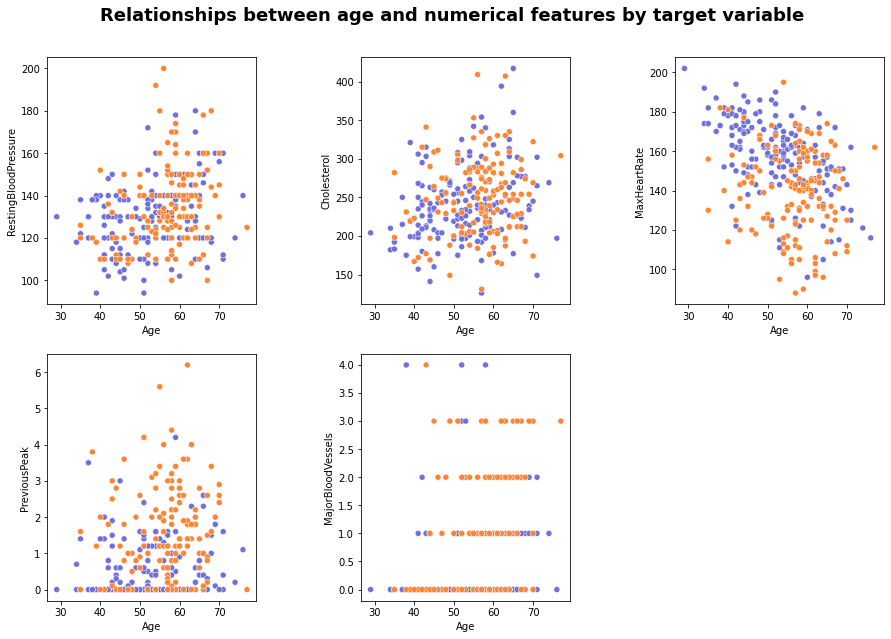

In [ ]:
x=0
fig=plt.figure(figsize=(15,10),constrained_layout =True)
plt.subplots_adjust(wspace = 0.5)
plt.suptitle("Relationships between age and numerical features by target variable",y=0.95, family='Sherif', size=18, weight='bold')
for i in df[numericals[1:]]:
  ax = plt.subplot(231+x)
  ax = sns.scatterplot(data=df, x='Age', y=i, hue='ProbHA', palette=colors)
  ax.legend_.remove()
  x+=1

# Data preparation

In [ ]:
# Split into features & target; train & test
# Normalize features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
y = df['ProbHA']
X = df.drop('ProbHA', axis = 1)

normalize = Normalizer()
X = normalize.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123, shuffle = True, stratify = y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(240, 13) (240,)
(61, 13) (61,)


# Modeling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

models = [('DT', DecisionTreeClassifier()),
          ('LR', LogisticRegression()), 
          ('SGDC', SGDClassifier()), 
          ('SVC', SVC())]

# Baseline models trainining and evaluation
for name, model in models:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f'The accuracy of {name} is {acc:.3f}')

The accuracy of DT is 0.787
The accuracy of LR is 0.623
The accuracy of SGDC is 0.607
The accuracy of SVC is 0.590


# Ensembling with XGBoost (Extreme Gradient Boosting)

In [ ]:
import xgboost as xgb

# Basline XGBClassifier
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train, y_train)
preds = xgb_cl.predict(X_test)
score = accuracy_score(y_test, preds)
print(f'The accuracy of XGBClassifier is {score:.3f}')

The accuracy of XGBClassifier is 0.902


## Hyperparameters tuning for XGBoost

In [ ]:
# Grid search
from sklearn.model_selection import GridSearchCV

params_grid = {'learning_rate':[0.01, 0.1, 0.5, 0.9],
              'n_estimators':[100,200,300],
              'subsample':[0.3, 0.5, 0.9],
               'max_depth':[2,3,4],
               'colsample_bytree':[0.3,0.5,0.7,1]}
grid = GridSearchCV(estimator=xgb_cl, param_grid=params_grid, scoring='accuracy', cv = 10, verbose = 0)

grid.fit(X_train, y_train)
print(f'Best params found for XGBoost are: {grid.best_params_}')
print(f'Best accuracy obtained by the best params: {grid.best_score_}')

Best params found for XGBoost are: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.9}
Best accuracy obtained by the best params: 0.8416666666666668


In [ ]:
preds = grid.best_estimator_.predict(X_test)
print(accuracy_score(y_test, preds))

0.9016393442622951


In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_curve, auc
# Confusion matrix
confusion_matrix(y_test, preds)

array([[23,  5],
       [ 1, 32]])

<Figure size 720x720 with 0 Axes>

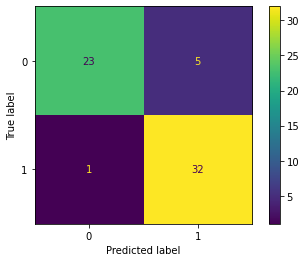

In [ ]:
plot_confusion_matrix(grid.best_estimator_, X_test, y_test)

Out of 61 samples, the XGBoost misscassified 6

## AUC evaluation of XGBoost

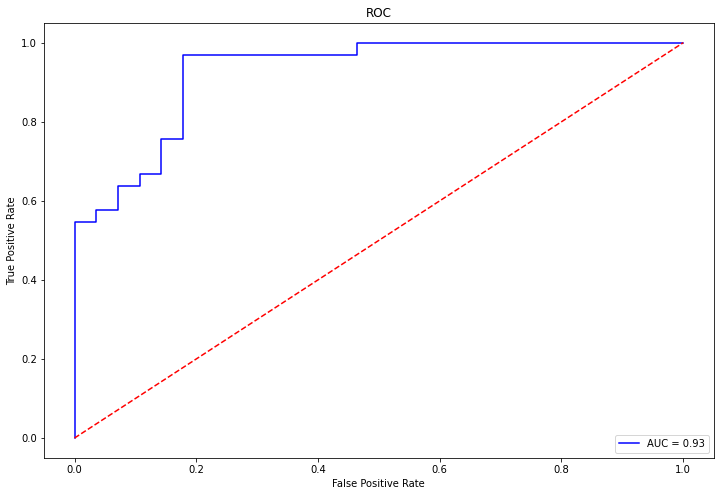

In [ ]:
probs = grid.best_estimator_.predict_proba(X_test)
pred = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,8))
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()